In [1]:
#inclusiones

import MLP_Complete as mlp
import pandas as pd
import numpy as np
import Utils as utl
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

LAYERS=(60, 60)
LAMBDA=0.0001
LR_INIT=0.2
ITERATIONS=3000

In [4]:
# lectura de los datos

data = pd.read_csv('preprocessedData.csv')
print(data)

       NEIGHBORHOOD_DIST_UP  NEIGHBORHOOD_DIST_DOWN  NEIGHBORHOOD_DIST_RIGHT  \
0                 -0.684733               -0.726171                -0.616927   
1                 -0.684733               -0.726171                -0.616927   
2                 -0.684733               -0.726171                -0.616927   
3                 -0.684733               -0.726171                -0.616927   
4                 -0.684733               -0.726171                -0.616927   
...                     ...                     ...                      ...   
29248             -0.646427               -0.707525                -0.682511   
29249             -0.646427               -0.707525                -0.682511   
29250             -0.646427                1.138425                -0.682511   
29251             -0.572579                1.064587                -0.682511   
29252             -0.480270                0.972289                -0.638185   

       NEIGHBORHOOD_DIST_LEFT  AGENT_1_

In [5]:
# separa los datos en datos de entrenamiento y datos de testeo (dividir tmb en datos de confirmacion???)

X = data.drop('action', axis=1).values

y = pd.get_dummies(data['action']).values
y_labels = data['action'].values

# separa los datos
X_train, X_test, y_train, y_test, y_train_lbl, y_test_lbl = train_test_split(
    X, y, y_labels, random_state=42, test_size=0.33, shuffle=True
)

A.) MLP Classifier Complete

In [50]:
# TODO

mlp_custom = mlp.MLP_Complete(inputLayer=X_train.shape[1], hiddenLayers=list(LAYERS), outputLayer=y_train.shape[1], seed=42)
mlp_custom.backpropagation(X_train, 
                        y_train, 
                        alpha=LR_INIT, 
                        lambda_=LAMBDA, 
                        numIte=ITERATIONS, 
                        verbose=100)

a, z = mlp_custom.feedforward(X_test)
y_pred_custom = mlp_custom.predict(a[-1])
    
acc_custom = accuracy_score(np.argmax(y_test, axis=1), y_pred_custom)

print(f"-> Precisión Custom MLP: {acc_custom * 100:.2f}%")

Iteration      1: Cost   3.4301   
Iteration    101: Cost   2.3183   
Iteration    201: Cost   2.1652   
Iteration    301: Cost   1.8456   
Iteration    401: Cost   1.8061   
Iteration    501: Cost   1.7870   
Iteration    601: Cost   1.7613   
Iteration    701: Cost   1.7190   
Iteration    801: Cost   1.6712   
Iteration    901: Cost   1.6395   
Iteration   1001: Cost   1.6151   
Iteration   1101: Cost   1.5902   
Iteration   1201: Cost   1.5650   
Iteration   1301: Cost   1.5441   
Iteration   1401: Cost   1.5292   
Iteration   1501: Cost   1.5180   
Iteration   1601: Cost   1.5084   
Iteration   1701: Cost   1.4996   
Iteration   1801: Cost   1.4913   
Iteration   1901: Cost   1.4834   
Iteration   2001: Cost   1.4758   
Iteration   2101: Cost   1.4685   
Iteration   2201: Cost   1.4614   
Iteration   2301: Cost   1.4545   
Iteration   2401: Cost   1.4477   
Iteration   2501: Cost   1.4411   
Iteration   2601: Cost   1.4345   
Iteration   2701: Cost   1.4279   
Iteration   2801: Co

B.) MLP Classifier de SKLearn 

In [ ]:
mlp_sklearn = MLPClassifier(
        hidden_layer_sizes=LAYERS,
        activation='logistic',     
        solver='sgd',             
        max_iter=ITERATIONS,
        learning_rate="constant",
        learning_rate_init=LR_INIT,
        alpha=LAMBDA,             
        random_state=42,
        n_iter_no_change=100,
        verbose=True
    )

mlp_sklearn.fit(X_train, y_train_lbl)

y_pred_sklearn = mlp_sklearn.predict(X_test)

acc_sklearn = accuracy_score(y_test_lbl, y_pred_sklearn)

print(f"-> Precisión SKLearn MLP: {acc_sklearn * 100:.2f}%")

Iteration 1, loss = 1.17167333
Iteration 2, loss = 0.91597259
Iteration 3, loss = 0.88294115
Iteration 4, loss = 0.84895050
Iteration 5, loss = 0.82060765
Iteration 6, loss = 0.79573361
Iteration 7, loss = 0.77557403
Iteration 8, loss = 0.75619253
Iteration 9, loss = 0.73696526
Iteration 10, loss = 0.72404354
Iteration 11, loss = 0.71119477
Iteration 12, loss = 0.69875042
Iteration 13, loss = 0.68772916
Iteration 14, loss = 0.67717715
Iteration 15, loss = 0.67021201
Iteration 16, loss = 0.66019370
Iteration 17, loss = 0.65494713
Iteration 18, loss = 0.64733629
Iteration 19, loss = 0.64129857
Iteration 20, loss = 0.63646396
Iteration 21, loss = 0.62982852
Iteration 22, loss = 0.62376378
Iteration 23, loss = 0.61650061
Iteration 24, loss = 0.61395961
Iteration 25, loss = 0.60715745
Iteration 26, loss = 0.60170590
Iteration 27, loss = 0.59570132
Iteration 28, loss = 0.59267602
Iteration 29, loss = 0.58680263
Iteration 30, loss = 0.58472185
Iteration 31, loss = 0.57939124
Iteration 32, los

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


NameError: name 'acc_sklearn' is not defined

C.) Comparacion con el MLP Classifier de SKLearn

In [ ]:
if abs(acc_custom - acc_sklearn) < 0.1:
    print("Los modelos se parecen en un rango del 10%")
else:
    print("Hay diferencia notable entre ambos modelos")

print(f"-> Precisión Custom MLP: {acc_custom * 100:.2f}%")
print(f"-> Precisión SKLearn MLP: {acc_sklearn * 100:.2f}%")

Hay diferencia notable entre ambos modelos
-> Precisión Custom MLP: 69.90%
-> Precisión SKLearn MLP: 85.95%


D.) KNN

In [ ]:
# Ns si aqui tiene q estar labeled o no???

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_lbl)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test_lbl, y_pred_knn)

print(f"-> Precisión KNN: {acc_knn * 100:.2f}%")

-> Precisión KNN: 82.97%


E.) Decision Tree & Random Forest

In [ ]:
# Ns si aqui tiene q estar labeled o no???

# Esto peta
#dt = DecisionTreeClassifier(max_depth=10, random_state=42)
#dt.fit(X_train, y_test_lbl)
#y_pred_dt = dt.predict(X_test)
#acc_dt = accuracy_score(y_test_lbl, y_pred_dt)

#print(f"-> Precisión DT: {acc_dt * 100:.2f}%")

rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train_lbl)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test_lbl, y_pred_rf)

print(f"-> Precisión RF: {acc_rf * 100:.2f}%")

-> Precisión RF: 85.84%


F.) Matriz de Confusion

Text(0.5, 1.0, 'RF\nAcc: 85.84%')

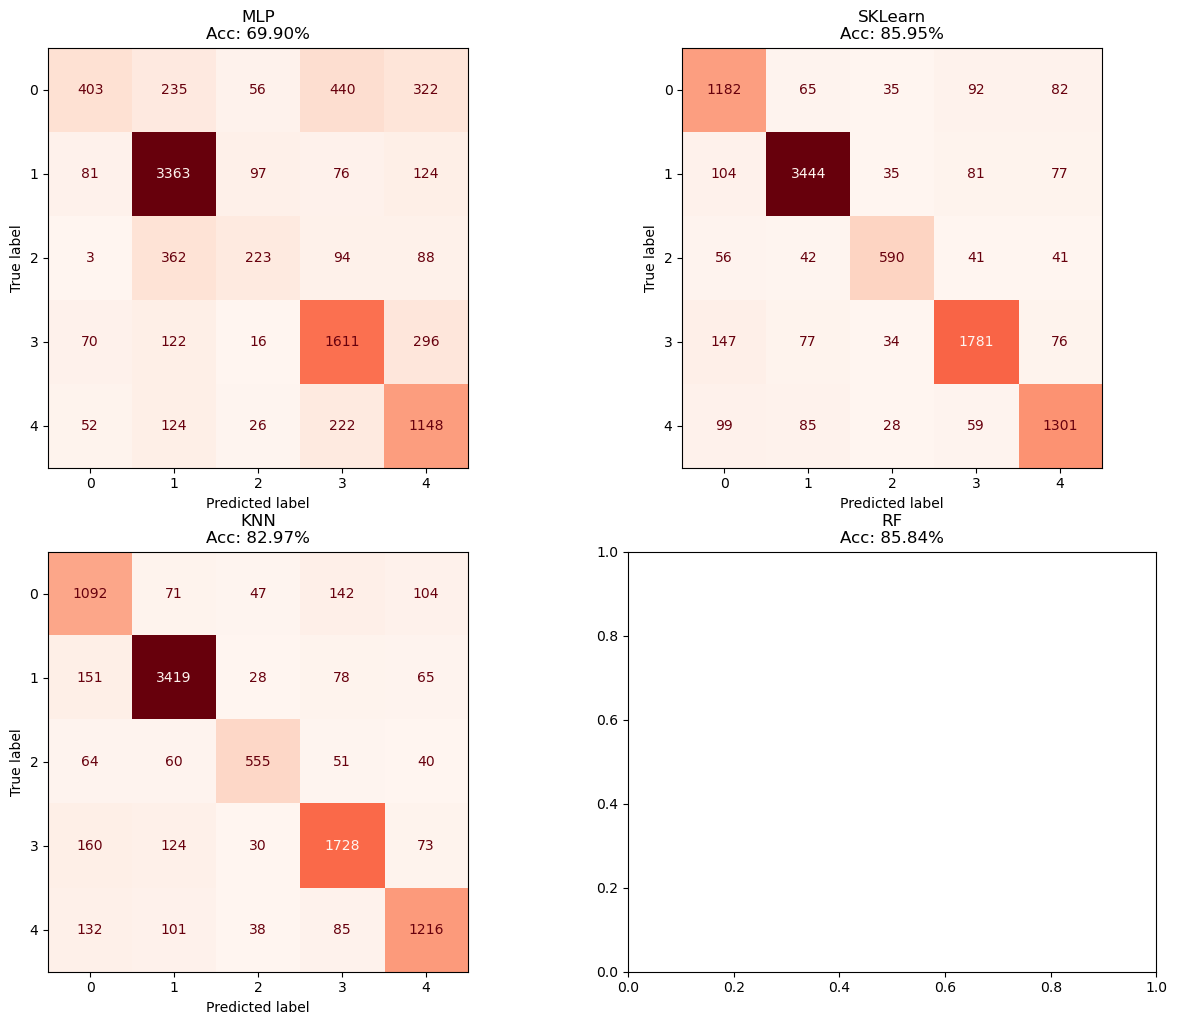

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()
ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_custom, ax=axes[0], cmap="Reds", colorbar=False)
axes[0].set_title(f"MLP\nAcc: {acc_custom * 100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_sklearn, ax=axes[1], cmap="Reds", colorbar=False)
axes[1].set_title(f"SKLearn\nAcc: {acc_sklearn * 100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_knn, ax=axes[2], cmap="Reds", colorbar=False)
axes[2].set_title(f"KNN\nAcc: {acc_knn * 100:.2f}%")
#ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_rf, ax=axes[3], cmap="Reds", colorbar=False) Esto peta
axes[3].set_title(f"RF\nAcc: {acc_rf * 100:.2f}%")

G.) Exportar modelo

In [2]:
utl.ExportAllformatsMLPSKlearn(mlp_sklearn, X_train, "pickle_format", "onix_format", "json_format", "custom_format")

NameError: name 'mlp_sklearn' is not defined